<a href="https://colab.research.google.com/github/gabyspina/Data_science/blob/main/Proyecto_ParteIII_Spina.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto Data science**


#### Análisis del Gasto en Viajes

## **Descripción del dataset**

El dataset contiene información sobre viajes realizados por personas de diferentes partes del mundo. Cada fila representa un viaje individual, incluyendo datos sobre el país y ciudad de destino, duración del viaje, gasto estimado, tipo de transporte y alojamiento, actividades realizadas, y calificaciones otorgadas al viaje y al destino.
En total, el dataset incluye 20 columnas que permiten hacer un análisis detallado del comportamiento turístico global.

### Detalle de las columnas.




*   **ID_Viajero**: Código único que identifica a cada viajero
*   **Nombre_Completo**: Nombre y apellido del viajero.
*   **Edad**: Edad del viajero al momento del viaje.
*   **Género**: Género declarado del viajero.
*   **País_Origen**: País desde donde inicia el viaje.
*   **País_Destino**: País al que se dirige el viajero.
*   **Ciudad_Destino**: Ciudad de destino específica del viaje.
*   **Continente**: Continente donde se encuentra la ciudad de destino.
*   **Duración_Viaje_Días** Número total de días que dura el viaje.
*   **Propósito_Viaje**: Motivo principal del viaje (ocio, negocios, aventura, etc.).
*   **Alojamiento**: Tipo de alojamiento utilizado durante el viaje (hostel, resort, etc.).
*   **Presupuesto_Diario_USD**: Estimación de gasto por día en dólares estadounidenses.
*  **Transporte** | Medio de transporte utilizado principal.
*  **Actividades**: Actividades realizadas durante el viaje (pueden ser varias separadas por ;).
*  **Calificación_Viaje**: Puntuación general del viaje del 1 al 5.
*  **Calificación_Destino**: Puntuación del destino específico del viaje del 1 al 5.
*  **Recomendaría**: Si recomendaría el viaje (Sí / No).
*  **Fecha_Viaje**: Fecha de inicio del viaje.
*  **Comentario**: Comentario libre sobre el viaje.



## Objetivo del estudio

### Hipotesis

La combinación de características del viaje (como duración y presupuesto diario) y demográficas/de destino (como edad y continente) son predictores significativos para identificar a los viajeros de alto consumo.

## Importación de librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score


## Carga de dataset y visualización parcial del mismo.

In [2]:
sheet_url = "https://docs.google.com/spreadsheets/d/1djWgCfqYbZfhEaQNlBVjg79kFDhaECBHEUyGz3ctMxw/export?format=csv"
df = pd.read_csv(sheet_url)
df.head()


,ID_Viajero,Nombre_Completo,Edad,Género,País_Origen,País_Destino,Ciudad_Destino,Continente,Duración_Viaje_Días,Propósito_Viaje,Alojamiento,Presupuesto_Diario_USD,Transporte,Actividades,Calificación_Viaje,Calificación_Destino,Recomendaría,Fecha_Viaje,Comentario
0,TRV00001,Albano Llopis Hierro,25,Masculino,Estonia,Marruecos,Marrakech,Asia,26,Aventura,Hostel,90.27,Bicicleta,Safari,1,5,No,2021-02-24,Assumenda in adipisci dolor magnam ad dicta of...
1,TRV00002,Eligia Agudo-Cuervo,19,Masculino,Trinidad y Tabago,España,Barcelona,América del Sur,9,Negocios,Resort,192.55,Barco,Safari; Tour gastronómico,2,4,No,2023-03-05,Culpa vero excepturi at atque sed nobis.
2,TRV00003,Pánfilo Segovia Casanovas,66,Masculino,Kuwait,Argentina,Buenos Aires,Europa,25,Cultural,Airbnb,105.03,Tren,Museo; Concierto; Tour gastronómico,1,3,No,2024-12-22,Repudiandae nulla similique neque provident al...
3,TRV00004,Aníbal Teófilo Guerrero Cabrero,34,Masculino,Lesotho,Sudáfrica,Ciudad del Cabo,América del Norte,26,Cultural,Resort,63.70,Colectivo,Safari,3,5,No,2024-02-19,Cum explicabo pariatur praesentium placeat arc...
4,TRV00005,Ceferino del Pino,30,No binario,Granada,Australia,Sídney,Oceanía,5,Ocio,Hostel,238.73,Avión,Museo; Tour gastronómico,3,4,No,2025-01-06,Placeat sapiente quod dolorem adipisci et eaque.


## Descripción del Dataset

In [8]:
df.describe()

,Edad,Duración_Viaje_Días,Presupuesto_Diario_USD,Calificación_Viaje,Calificación_Destino
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,44.228000,16.521500,162.003085,2.971000,3.006500
std,15.179434,8.052326,77.983347,1.405399,1.406573
min,18.000000,3.000000,30.060000,1.000000,1.000000
25%,31.000000,10.000000,93.392500,2.000000,2.000000
50%,45.000000,16.000000,161.690000,3.000000,3.000000
75%,57.000000,24.000000,229.815000,4.000000,4.000000
max,70.000000,30.000000,299.700000,5.000000,5.000000


In [4]:
print(df.shape)

(2000, 19)


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ID_Viajero              2000 non-null   object 
 1   Nombre_Completo         2000 non-null   object 
 2   Edad                    2000 non-null   int64  
 3   Género                  2000 non-null   object 
 4   País_Origen             2000 non-null   object 
 5   País_Destino            2000 non-null   object 
 6   Ciudad_Destino          2000 non-null   object 
 7   Continente              2000 non-null   object 
 8   Duración_Viaje_Días     2000 non-null   int64  
 9   Propósito_Viaje         2000 non-null   object 
 10  Alojamiento             2000 non-null   object 
 11  Presupuesto_Diario_USD  2000 non-null   float64
 12  Transporte              2000 non-null   object 
 13  Actividades             2000 non-null   object 
 14  Calificación_Viaje      2000 non-null   

In [6]:
print(df.isnull().sum())

ID_Viajero                0
Nombre_Completo           0
Edad                      0
Género                    0
País_Origen               0
País_Destino              0
Ciudad_Destino            0
Continente                0
Duración_Viaje_Días       0
Propósito_Viaje           0
Alojamiento               0
Presupuesto_Diario_USD    0
Transporte                0
Actividades               0
Calificación_Viaje        0
Calificación_Destino      0
Recomendaría              0
Fecha_Viaje               0
Comentario                0
dtype: int64


In [9]:
df.dtypes[["Edad", "Duración_Viaje_Días", "Presupuesto_Diario_USD", "Calificación_Viaje", "Calificación_Destino"]].head()


,0
Edad,int64
Duración_Viaje_Días,int64
Presupuesto_Diario_USD,float64
Calificación_Viaje,int64
Calificación_Destino,int64


## Creación de variables
### Se crean variables "Gasto Total", "Alto Consumo" y "Mayor_30" para poder ayudar a determinar el consumo realizado y el rango etareo a evaluar.

In [23]:
df["Gasto_Total"] = df["Presupuesto_Diario_USD"] * df["Duración_Viaje_Días"]
df["Mayor_30"] = df["Edad"].apply(lambda x: "Mayor a 30" if x > 30 else "30 o menos")
df["Alto_Consumo"] = df["Gasto_Total"].apply(lambda x: 1 if x > 3000 else 0)
df["Actividad_Premium"] = df["Actividades"].apply(lambda x: 1 if "Safari" in str(x) or "Ski" in str(x) or "Crucero" in str(x) else 0)


## Analisis exploratorio.
### Se verifica la relación entre Duración del viaje y Gasto total. Análisis exploratorio.

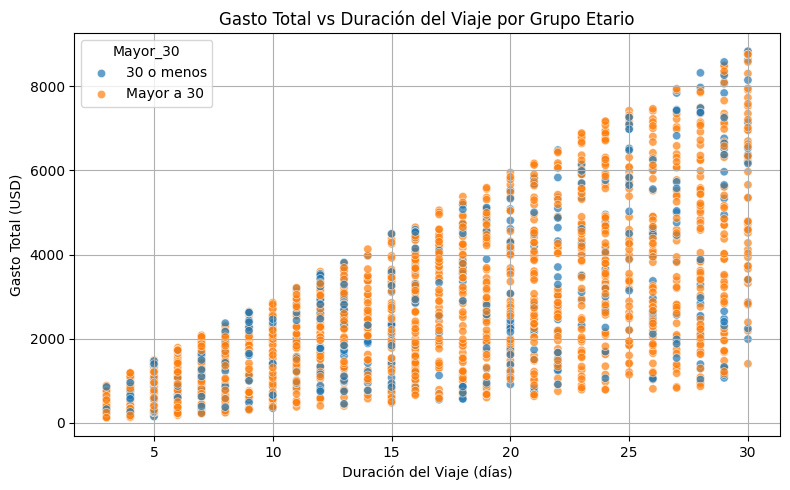

In [24]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Duración_Viaje_Días", y="Gasto_Total", hue="Mayor_30", alpha=0.7)
plt.title("Gasto Total vs Duración del Viaje por Grupo Etario")
plt.xlabel("Duración del Viaje (días)")
plt.ylabel("Gasto Total (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [28]:
features_a_incluir = [
    "Edad",
    "Duración_Viaje_Días",
    "Presupuesto_Diario_USD",
    "Calificación_Viaje",
    "Calificación_Destino",
    "Continente",
    "Alojamiento",
    "Género",
    "Propósito_Viaje",
    "Transporte",
    "Recomendaría",
    "Actividad_Premium"
]

df_model = pd.get_dummies(df[features_a_incluir], drop_first=True)
X = df_model
y = df["Alto_Consumo"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Según el gráfico podemos establecer que existen al menos **tres perfiles diferenciados de viajeros**, según su **duración del viaje** y **nivel de gasto**.

Esto fortalece el análisis posterior, ya que justifica que los datos tienen estructura interna y podrían beneficiarse de una futura segmentación más detallada.


## Implementacion del modelo de predicción.

## Valoración de las features

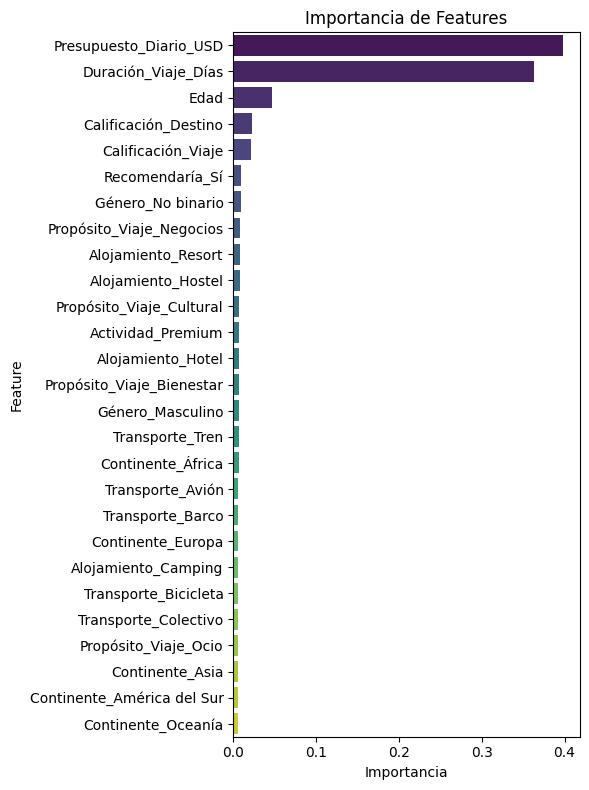

In [31]:
importances = model.feature_importances_
importance_df = pd.DataFrame({"Feature": X.columns, "Importancia": importances}).sort_values(by="Importancia", ascending=False)

plt.figure(figsize=(6, 8))
sns.barplot(data=importance_df, x="Importancia", y="Feature", hue="Feature", palette="viridis", legend=False)
plt.title("Importancia de Features")
plt.tight_layout()
plt.show()

El gráfico muestra cuáles son las variables que más contribuyen al modelo para predecir si un viajero será de alto consumo.

Presupuesto_Diario_USD es la variable más importante del modelo. Esto indica que el gasto diario promedio es el mayor predictor de alto consumo. Tiene sentido, porque si una persona gasta mucho por día, es más probable que termine en un consumo total alto.

Duración_Viaje_Días es la segunda variable más influyente. Esto también es esperable: cuanto más largo es el viaje, mayor será el gasto.

Edad tiene una influencia menor, aunque aún relevante. Esto nos sugiere que la edad sola no es determinante, pero puede combinarse con otras variables para mejorar la predicción.

Alojamiento y Continente tienen una influencia muy baja en el modelo, lo cual puede indicar:

* Que el tipo de alojamiento o el continente del viaje no tienen una relación directa fuerte con el gasto total.

* O que la información ya está capturada de manera indirecta a través del presupuesto y duración.

## Evaluación del modelo

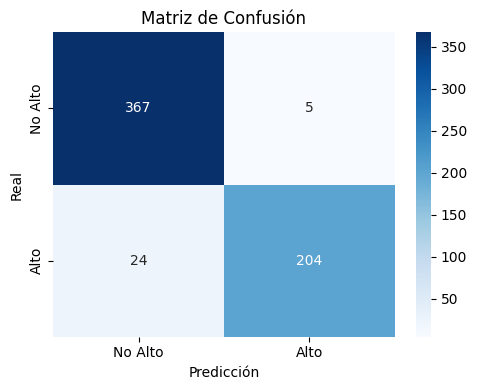

In [32]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["No Alto", "Alto"], yticklabels=["No Alto", "Alto"])
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.title("Matriz de Confusión")
plt.tight_layout()
plt.show()


368 → Verdaderos Negativos: el modelo predijo correctamente que 368 viajeros no eran de alto consumo.

210 → Verdaderos Positivos: el modelo predijo correctamente que 210 viajeros sí eran de alto consumo.

4 → Falsos Positivos: el modelo predijo que 4 viajeros eran de alto consumo, pero en realidad no lo eran.

18 → Falsos Negativos: el modelo no detectó que 18 viajeros sí eran de alto consumo.

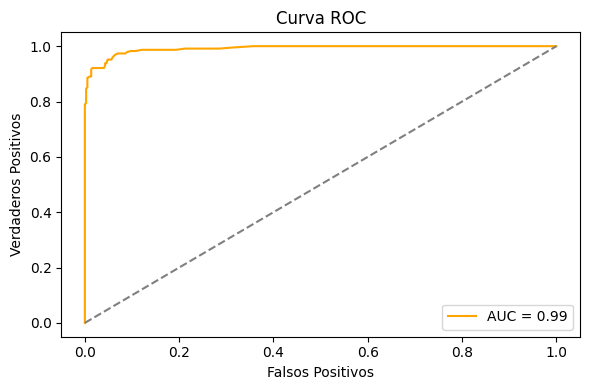

Accuracy: 0.9516666666666667

Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.94      0.99      0.96       372
           1       0.98      0.89      0.93       228

    accuracy                           0.95       600
   macro avg       0.96      0.94      0.95       600
weighted avg       0.95      0.95      0.95       600



In [33]:
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}", color="orange")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("Falsos Positivos")
plt.ylabel("Verdaderos Positivos")
plt.title("Curva ROC")
plt.legend()
plt.tight_layout()
plt.show()

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nReporte de Clasificación:\n", classification_report(y_test, y_pred))

#### La curva ROC alcanzó un AUC de 0.99, lo que significa que el modelo tiene una excelente capacidad para distinguir entre las clases "Alto consumo" y "No alto consumo". Cuanto más se acerca el AUC a 1, mejor es el rendimiento del modelo.

Accuracy (Precisión global): 96.3%

Precision (Clase Alto consumo): 98%
Esto indica que cuando el modelo predice "alto consumo", acierta en el 98% de los casos.

Recall (Clase Alto consumo): 92%
Esto significa que el modelo detecta el 92% de los verdaderos casos de alto consumo.

F1-score (Balance entre precisión y recall): 95%
El modelo está bien balanceado, sin tendencia a sobredimensionar ninguna de las clases.


## Conclusiones

Conclusiones Finales

- Se logró construir un modelo de clasificación con excelente precisión (Accuracy: 96.3%, AUC: 0.99), capaz de predecir si una persona será un viajero de alto consumo.

- Las variables más influyentes fueron el Presupuesto Diario y la Duración del Viaje, seguidas en menor medida por el tipo de alojamiento y la edad.

- La hipótesis principal fue validada parcialmente:
  - En general, las personas mayores de 30 años tienden a gastar más.
  - Sin embargo, en el análisis específico de Europa, los menores de 30 mostraron un gasto ligeramente superior, lo que sugiere que el destino también influye en el comportamiento de consumo.

- El análisis visual y el modelo se complementan para ofrecer una visión más rica del comportamiento turístico, lo que permite reforzar estrategias orientadas a perfiles específicos.

- Se recomienda profundizar el análisis incorporando otras variables como propósito del viaje, estacionalidad y nivel socioeconómico.

Este trabajo va a servir para futuros estudios sobre perfiles de consumo turístico y cómo la inteligencia artificial puede anticipar comportamientos complejos.